# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | vegreville
Processing Record 4 of Set 1 | jining
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | kudahuvadhoo
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | yagry
City not found. Skipping...
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | vila velha
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | ginir
Processing Record 16 of Set 1 | galliano
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | la passe
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | west is

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,13.67,63,0,1.54,US,1729380248
1,grytviken,-54.2811,-36.5092,-3.63,73,15,3.29,GS,1729380250
2,vegreville,53.5001,-112.0518,13.30,46,100,2.06,CA,1729380251
3,jining,35.4050,116.5814,7.22,69,100,2.42,CN,1729380252
4,bredasdorp,-34.5322,20.0403,9.93,82,7,0.44,ZA,1729380253


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,13.67,63,0,1.54,US,1729380248
1,grytviken,-54.2811,-36.5092,-3.63,73,15,3.29,GS,1729380250
2,vegreville,53.5001,-112.0518,13.30,46,100,2.06,CA,1729380251
3,jining,35.4050,116.5814,7.22,69,100,2.42,CN,1729380252
4,bredasdorp,-34.5322,20.0403,9.93,82,7,0.44,ZA,1729380253


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

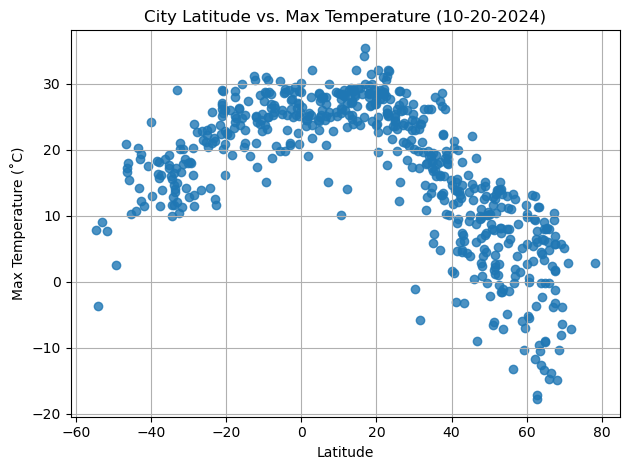

In [29]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y1_value = city_data_df["Max Temp"]
plt.scatter(x_value,y1_value, alpha=.8)

#Format the date
from datetime import datetime
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (˚C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

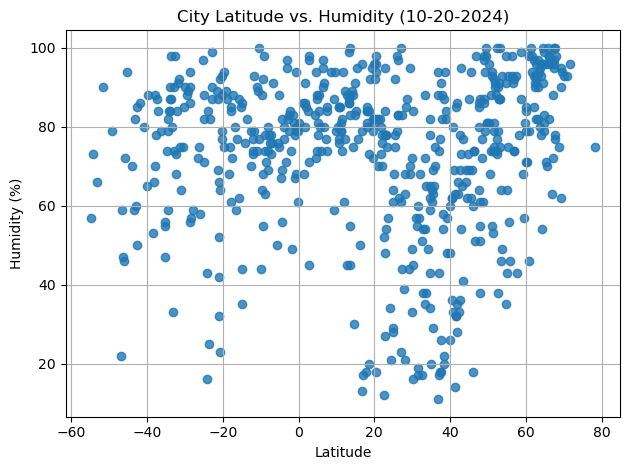

In [28]:
# Build the scatter plots for latitude vs. humidity
y2_value = city_data_df["Humidity"]
plt.scatter(x_value, y2_value, alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

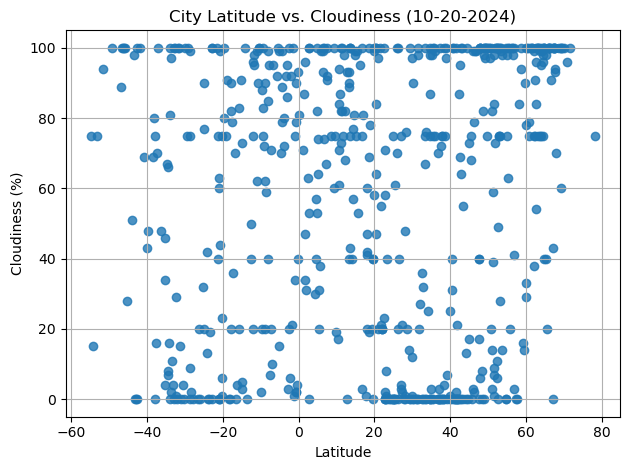

In [30]:
# Build the scatter plots for latitude vs. cloudiness
y3_value = city_data_df["Cloudiness"]
plt.scatter(x_value, y3_value, alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

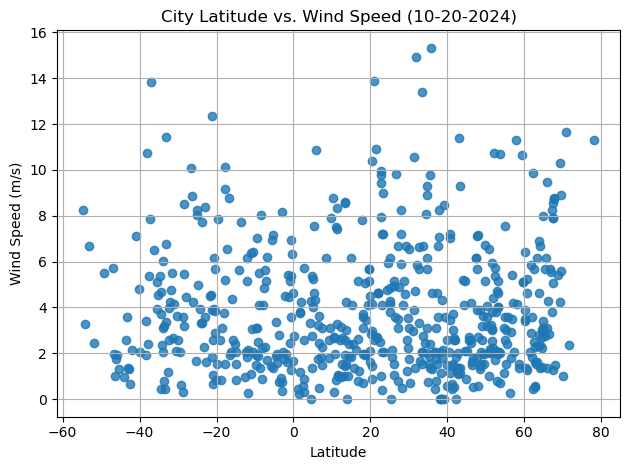

In [31]:
# Build the scatter plots for latitude vs. wind speed
y4_value = city_data_df["Wind Speed"]
plt.scatter(x_value, y4_value, alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, xlabel, ylabel, title):
    #Create scatter plot
    plt.scatter(x,y,alpha=.8)

    #Preform linear regression
    (slope, intercept, rvalue, pvalue, stderr) =linregress(x,y)

    #Calculate regression and plot the line
    line_fit = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept, 2))
    plt.plot(x, line_fit, color="red")
    plt.annotate(line_eq,(x.min(),y.min()), fontsize=15, color="red")

    #Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    #Show the plot
    plt.show()

    #Print the equation and the R-squared value
    print(f"The equation of the line is y = {slope:.2f}x + {intercept:.2f}")
    print(f"The r-squared value is {rvalue**2:.3f}")



In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])>0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,13.67,63,0,1.54,US,1729380248
2,vegreville,53.5001,-112.0518,13.30,46,100,2.06,CA,1729380251
3,jining,35.4050,116.5814,7.22,69,100,2.42,CN,1729380252
5,albany,42.6001,-73.9662,12.66,69,0,1.20,US,1729379900
6,kudahuvadhoo,2.6708,72.8944,28.02,71,53,5.73,MV,1729380255


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-3.63,73,15,3.29,GS,1729380250
4,bredasdorp,-34.5322,20.0403,9.93,82,7,0.44,ZA,1729380253
7,waitangi,-43.9535,-176.5597,10.75,70,51,0.96,NZ,1729380257
9,ushuaia,-54.8000,-68.3000,7.81,57,75,8.23,AR,1729380261
10,puerto natales,-51.7236,-72.4875,7.72,90,94,2.43,CL,1729380124


###  Temperature vs. Latitude Linear Regression Plot

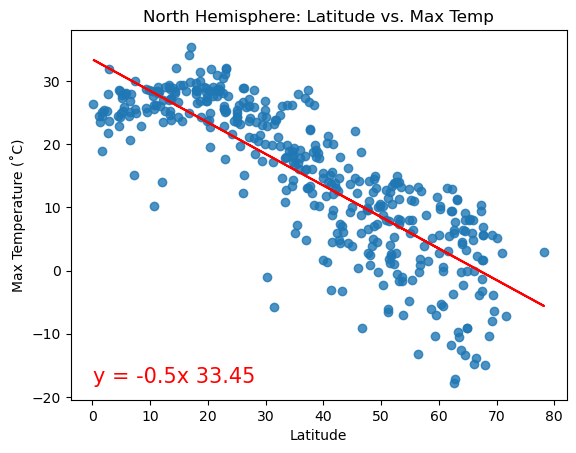

The equation of the line is y = -0.50x + 33.45
The r-squared value is 0.685


In [69]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"] , "Latitude", "Max Temperature (˚C)", "North Hemisphere: Latitude vs. Max Temp")

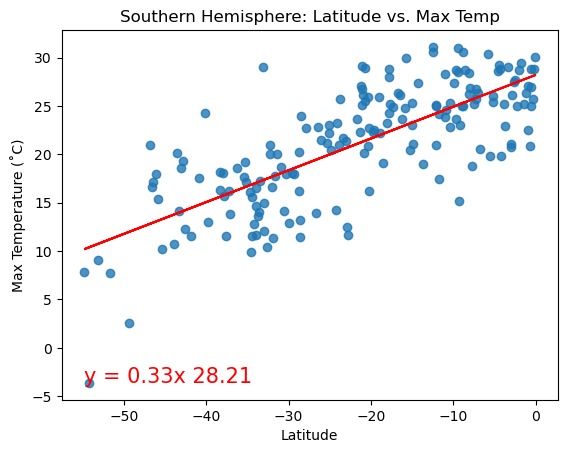

The equation of the line is y = 0.33x + 28.21
The r-squared value is 0.563


In [70]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (˚C)", "Southern Hemisphere: Latitude vs. Max Temp")

**Discussion about the linear relationship:** The linear relationship between the latitude and maximum temperature is measured by the R-squared value, which is also called the Coefficient of Determination.
The Northen Hemisphere has a slightly strong Coefficient of Determination given that the R-squared value is 0.685. Also, the values have a negative trend, which make sense becasue as the latitude increases, meaning getting further away from the Equator, the maximum temperature gets lower.
On the other hand, the Southern Hemisphere has a moderate Coefficient of Determination given that the R-squared value is 0.563. The values here have a positive trend, which again, does make sense because as the latitude increases, meaning getting closer towards the Equator, the maximum temperature gets higher.

### Humidity vs. Latitude Linear Regression Plot

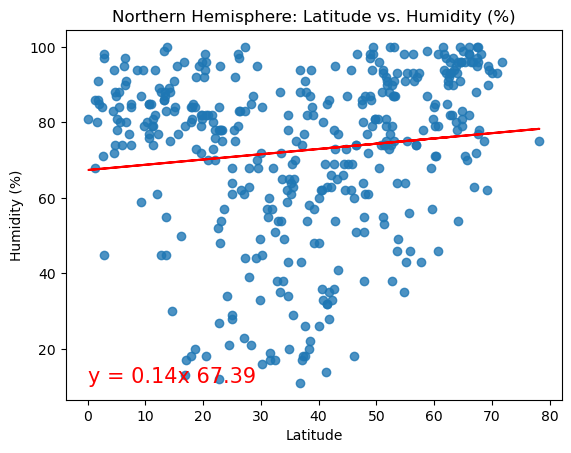

The equation of the line is y = 0.14x + 67.39
The r-squared value is 0.015


In [71]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere: Latitude vs. Humidity (%)")

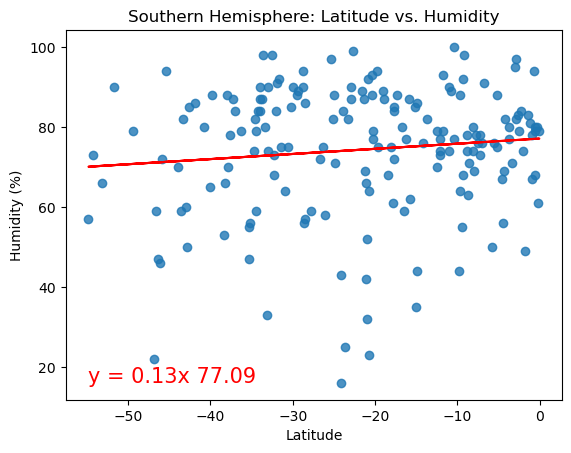

The equation of the line is y = 0.13x + 77.09
The r-squared value is 0.012


In [72]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere: Latitude vs. Humidity")

**Discussion about the linear relationship:** The linear relationship between the latitude and the humidity is really weak, which means that the humidity is not dependent on the latitude. Even without finding the R-sqaure value, the scatter plot shows that all the points are scattered around, and there is no trend.

### Cloudiness vs. Latitude Linear Regression Plot

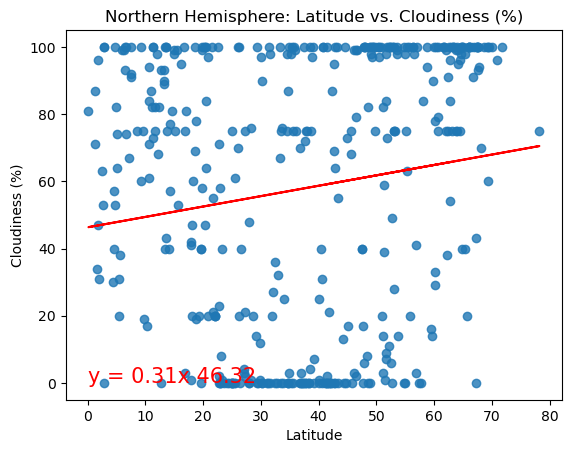

The equation of the line is y = 0.31x + 46.32
The r-squared value is 0.022


In [73]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere: Latitude vs. Cloudiness (%)")

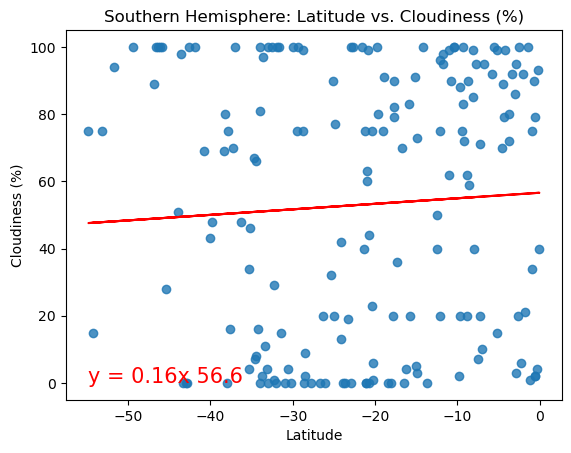

The equation of the line is y = 0.16x + 56.60
The r-squared value is 0.004


In [74]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere: Latitude vs. Cloudiness (%)")

**Discussion about the linear relationship:** Similar to latitude vs. humidity, the linear relationship between the latitude and the cloudiness is really weak, which means that cloudiness is not dependent on the latitude. Even without finding the R-sqaure value, the scatter plot shows that all the points are scattered around, and there is no trend.

### Wind Speed vs. Latitude Linear Regression Plot

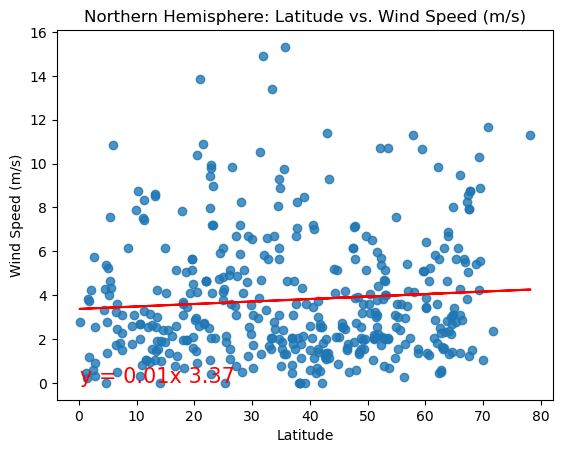

The equation of the line is y = 0.01x + 3.37
The r-squared value is 0.006


In [75]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere: Latitude vs. Wind Speed (m/s)")

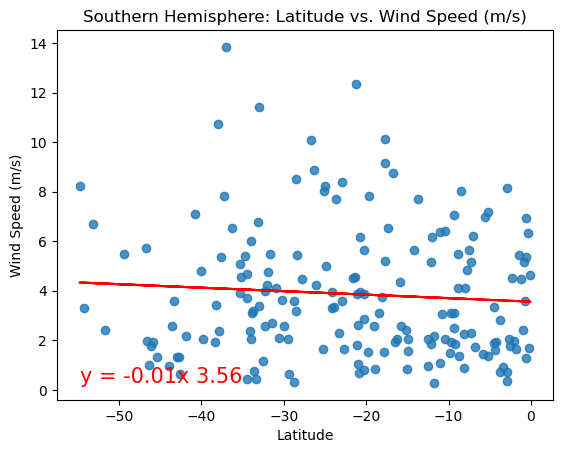

The equation of the line is y = -0.01x + 3.56
The r-squared value is 0.006


In [76]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere: Latitude vs. Wind Speed (m/s)")

**Discussion about the linear relationship:** The linear relationship between the latitude and the wind speed is really weak, which means that the wind speed is not dependent on the latitude. Even without finding the R-sqaure value, the scatterplot shows that all the points are scattered around, and there is no trend.